In [1]:
#https://datadryad.org/stash/dataset/doi:10.5061/dryad.4ch10

In this notebook I will compare simulated spike trains of Poisson process neurons to real spike trains from 30 retina ganglions cells downloaded from here https://datadryad.org/stash/dataset/doi:10.5061/dryad.4ch10 . Each simulated neuron comes from a Poisson process with the same mean firing rate parameter as a real neuron. There are 1000 simulated neurons per one real neuron. I will then use Van Rossum distance to find pairs of neurons that are most similar in the simulation (amongst the 1000 neurons with the same mean parameter as  vs real data. I will evaluate the inter spike intervals (ISI) of Poisson neurons and real neurons. We use the Elephant library for simulation and data analysis.

In [71]:
from scipy import io
import numpy as np
import elephant
import neo
from quantities import ms, s, kHz
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant.statistics import isi 
import matplotlib.pyplot as plt
from elephant.spike_train_dissimilarity import van_rossum_dist
%matplotlib inline

# Simulating Poisson spike trains

In [4]:
dat=io.loadmat('/media/maria/DATA1/Documents/NeuralData/RetinaDataFactorizationsOfPopulationSpikeTrains/NeuralData/Spikes/Movie1Exp1.mat')

In [64]:
print(dat.keys())
print(dat['Spikes'].shape)
#print(dat['Spikes'])

dict_keys(['__header__', '__version__', '__globals__', 'n_trials', 'n_neurons', 'Spikes'])
(38, 30)


Generating one Poisson spike train with the same rate as the first trial of the very first neuron (out of 38).

1.5333333333333334 1/ms
[  572.13278968   786.98676663  1138.12789767  1150.42751334
  2848.55347293  2894.63636725  3123.18688014  4937.78059364
  6058.59414547  7131.80601812  7662.20973748  8283.29239331
  9876.55545622 10903.73034142 11042.80412459 13697.56553715
 14531.86188261] ms
[  40. 2590.  349.  353. 1936.   10.   14.   13.   18.  494.  376.  627.
   18. 1238.  570.  632.  914.   37.  995.  417.  492.   87.] ms
[ 214.85397695  351.14113104   12.29961567 1698.12595959   46.08289432
  228.55051289 1814.5937135  1120.81355183 1073.21187264  530.40371937
  621.08265582 1593.26306291 1027.17488519  139.07378317 2654.76141256
  834.29634546] ms


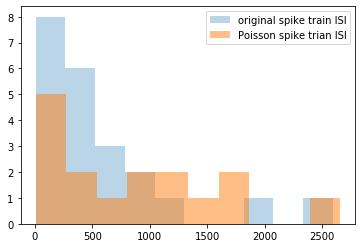

In [60]:
train = neo.SpikeTrain(dat['Spikes'][0][0].flatten()*ms, t_stop=15000.0)
rate=elephant.statistics.mean_firing_rate(train)
print(rate*1000)
poisson_spike =homogeneous_poisson_process(rate=rate, t_start=0.*ms, t_stop=15000.*ms)
print(poisson_spike)
print(isi(train))
print(isi(poisson_spike))
plt.hist(isi(np.array(train)),label='original spike train ISI',alpha=0.3)
plt.hist((isi(np.array(poisson_spike))),label='Poisson spike trian ISI',alpha=0.5)
plt.legend()


In [87]:
def generate_1000_spike_trains(rate):
    total_array=[]
    for j in range(0,1000):
        poisson_spike =homogeneous_poisson_process(rate=rate, t_start=0.*ms, t_stop=15000.*ms)
        total_array.append(list(np.array(poisson_spike))*ms)
    return total_array
poisson_spikes=generate_1000_spike_trains(rate)
poisson_spikes[0]

array([   35.56648782,    73.15567159,  1101.64579057,  3641.95188539,
        5839.14156745,  6744.06601402,  7382.61859112,  7388.57895962,
        7939.57844364,  8063.48926727,  9715.00815554, 12692.33239123,
       12809.36668697, 13249.5886014 , 14982.45281765]) * ms

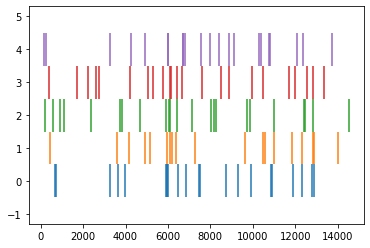

NameError: name 'closest_neuron' is not defined

In [109]:
def compute_van_rossum_dist(original_spikes,poisson_spikes):
    dist_lst=[]
    for sim_neuron in poisson_spikes:
        #print(original_spikes)
        #print(poisson_spikes[0])
        #print(van_rossum_dist([original_spikes,sim_neuron]))
        dist_lst.append(van_rossum_dist([original_spikes,sim_neuron])[0,1])
    closest_neurons=np.argsort(dist_lst)
    colors=['C{}'.format(i) for i in range(5)]
    lst=[original_spikes]
    for j in range(0,4):
        lst.append(poisson_spikes[closest_neurons[j]])
    plt.eventplot(lst,lineoffsets=[0,1,2,3,4],colors=colors)
    plt.show()
    return dist_lst, closest_neuron

compute_van_rossum_dist(train,poisson_spikes)

# Analyzing real data